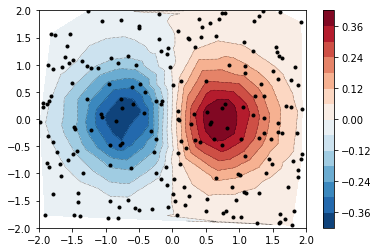

In [4]:
# サンプル4-22-1
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

x = np.random.uniform(-2, 2, 200)  # -2～2の範囲で200個の値をサンプリング
y = np.random.uniform(-2, 2, 200)  # -2～2の範囲で200個の値をサンプリング
z = x * np.exp(-x**2 - y**2)       # ネイピア数の(-x**2 - y**2)乗

# 2×1のAxesを生成
fig, ax1 = plt.subplots()

## 不規則に間隔を置いたデータ座標の等高線図
# 等高線を描画
ax1.tricontour(x, y,                # x,yの座標
               z,                   # 等高線のポイント
               14,                  # 等高線の間隔
               linewidths=0.5,      # 等高線の幅
               linestyles='dotted', # 等高線の形状
               colors='black'       # 等高線の色
              )

# 等高線の領域の塗りつぶしを描画
cntr = ax1.tricontourf(x, y, z,
                        14,
                        cmap='RdBu_r'
                       )

# 1つ目のAxesにカラーバーを描画
fig.colorbar(cntr, ax=ax1)

# マーカーをプロットし、軸の範囲とタイトルを設定
ax1.plot(x, y, 'ko', ms=3)
ax1.axis((-2, 2, -2, 2))

plt.show()

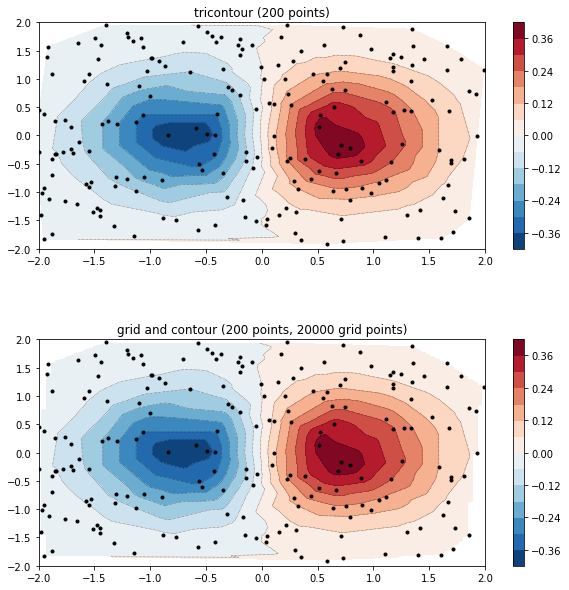

In [2]:
# サンプル4-22-2
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

npts = 200    # x、yのデータの個数
ngridx = 100  # xのグリッド数
ngridy = 200  # yのグリッド数

x = np.random.uniform(-2, 2, npts) # -2～2の範囲で200個の値をサンプリング
y = np.random.uniform(-2, 2, npts) # -2～2の範囲で200個の値をサンプリング
z = x * np.exp(-x**2 - y**2)       # ネイピア数の(-x**2 - y**2)乗

# 2×1のAxesを生成
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

## 不規則に間隔を置いたデータ座標の等高線図
# 等高線を描画
ax1.tricontour(x, y,                # x,yの座標
               z,                   # 等高線のポイント
               14,                  # 等高線の間隔
               linewidths=0.5,      # 等高線の幅
               linestyles='dotted', # 等高線の形状
               colors='black'       # 等高線の色
              )

# 等高線の領域の塗りつぶしを描画
cntr1 = ax1.tricontourf(x, y, z,
                        14,
                        cmap='RdBu_r'
                       )

# 1つ目のAxesにカラーバーを描画
fig.colorbar(cntr1, ax=ax1)


## 不規則に間隔を置いたデータ座標の等高線図
# グリッド上の補間を使用

# -2.1～2の範囲でグリッド値を作成
xi = np.linspace(-2.1, 2.1, ngridx) # xのグリッド値は100個
yi = np.linspace(-2.1, 2.1, ngridy) # yのグリッド値は200個

# （xi,yi）によって定義されるグリッド上のデータ（x、y）の線形補間を行う
# 非構造化三角グリッド関数
triang = tri.Triangulation(x, y)
# 三角形のグリッドに対して線形補間を実行
interpolator = tri.LinearTriInterpolator(triang, z)
# 座標ベクトルから座標行列を取得
Xi, Yi = np.meshgrid(xi, yi)
# 線形補間した結果をziに代入
zi = interpolator(Xi, Yi)

# 等高線を描画
ax2.contour(xi, yi,              # x,yの座標
            zi,                  # 等高線のポイント
            14,                  # 等高線の間隔
            linewidths=0.5,      # 等高線の幅
            linestyles='dotted', # 等高線の形状
            colors='black'       # 等高線の色    
           )

# 等高線の領域の塗りつぶしを描画
cntr2 = ax2.contourf(xi, yi, zi,
                     14,           # 等高線の間隔
                     cmap='RdBu_r' # 塗りつぶしに使用するカラーマップ
                    )
# 1つ目のAxesにカラーバーを描画
fig.colorbar(cntr2, ax=ax2)

# マーカーをプロットし、軸の範囲とタイトルを設定
ax2.plot(x, y, 'ko', ms=3)
ax2.axis((-2, 2, -2, 2))
ax2.set_title('grid and contour (%d points, %d grid points)' %
              (npts, ngridx * ngridy))

# マーカーをプロットし、軸の範囲とタイトルを設定
ax1.plot(x, y, 'ko', ms=3)
ax1.axis((-2, 2, -2, 2))
ax1.set_title('tricontour (%d points)' % npts)

# Axesの縦のスペースを空ける
plt.subplots_adjust(hspace=0.4)
plt.show()